In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from metpy.units import units

In [2]:
#create small domain
lath = 30. + np.arange(0,75)*.25
lonh = -125. + np.arange(0,100)*.25
tlon = lonh[-1]-lonh[0]
tlat = lath[-1]-lath[0]
#print(tlat,tlon)
orig_x = -110.
orig_y = 40.

In [3]:
#create 2D fields of locations
xh,yh = np.meshgrid(lonh,lath)
xd = np.shape(xh)
yd = np.shape(yh)
print(xd,yd)

#compute distances bwtween grid points in 2D arrays
dx, dy = mpcalc.lat_lon_grid_deltas(xh,yh)

(75, 100) (75, 100)


In [4]:
#plot as lambert conformal
mapcrs = ccrs.LambertConformal(central_longitude=-110,
                               central_latitude=45,
                               standard_parallels=(30, 60))
# Set up the projection of the data
datacrs = ccrs.PlateCarree()
#colormap used
colormap = cm.get_cmap('RdBu_r')

In [5]:
#specify temperature field
t = 5 * (orig_y-yh)/tlat + 5 * (xh-orig_x)/tlon
t = t * units.degC
#specify wind speed
sp = 15
#specify tadv color interval
tadv_int=2

#specify meridional wind field
u = np.zeros((75,100))
v = -sp * (yh-orig_y)/tlat

u = u * units('m/s')
v = v * units('m/s')

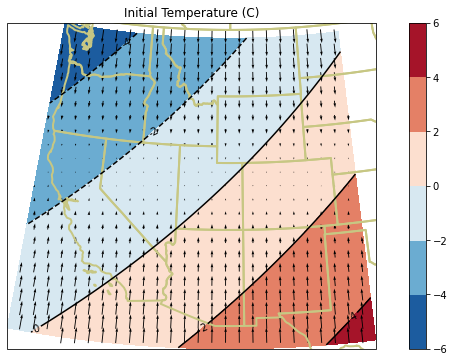

In [6]:
#plot temperature field
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t,colors='black',levels=range(-6,8,2),transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,t,levels=range(-6,8,2),cmap=colormap,transform=datacrs)
#ax.clabel(cs1,fmt='%0.1f',inline=True)
cb=plt.colorbar(cs1)
ax.quiver(xh, yh, u.m, v.m, pivot='middle',
         color='black', regrid_shape=25, transform=datacrs)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('Initial Temperature (C)')
plt.savefig('../figs/temp.png')
plt.show()

In [7]:
#compute temp advect for steady wind field
u = np.zeros((75,100))
v = -sp * (yh-orig_y)/tlat

u = u * units('m/s')
v = v * units('m/s')
#print(t[10,10],u[10,10],v[10,10])
tadv=mpcalc.advection(t,(u,v),(dx,dy))
#print(tadv[10,10])
#convert to C/(day)
tadv = 24*3600 * tadv
#print(np.nanmin(tadv.m),np.nanmax(tadv.m))
#tadv_r = np.nanmax(tadv.m)-np.nanmin(tadv.m)
#tadv_int = int(tadv_r/8)
#print(tadv_int)

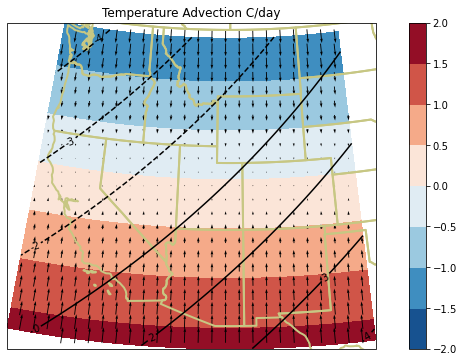

In [8]:
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t,colors='black',transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,tadv.m,levels=np.arange(-2,2.5,.5),cmap=colormap,transform=datacrs)
cb=plt.colorbar(cs1)
ax.quiver(xh, yh, u.m, v.m, pivot='middle',
         color='black', regrid_shape=25, transform=datacrs)
#ax.streamplot(xh,yh, u.m,v.m,transform=datacrs,arrowsize=1,color='green')


ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('Temperature Advection C/day')
plt.savefig('../figs/tadv_mer.png')
plt.show()

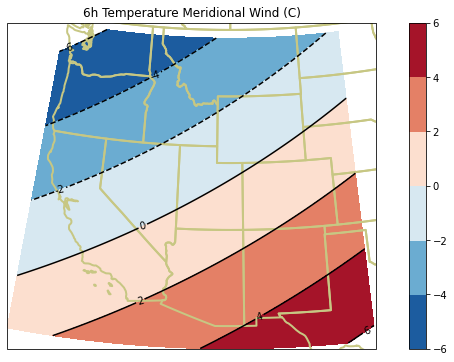

In [9]:
#temp after 6 hours in rotational wind
t6 = t.m + tadv.m
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t6,colors='black',levels=range(-6,8,2),transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,t6,cmap=colormap,levels=range(-6,8,2),transform=datacrs)
#ax.clabel(cs1,fmt='%0.1f',inline=True)
cb=plt.colorbar(cs1)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('6h Temperature Meridional Wind (C)')
plt.savefig('../figs/t6_mer.png')
plt.show()

In [10]:
#compute temp advect for pure vorticity wind field
u = -np.sqrt(sp) * np.sin(2*np.pi*(yh-orig_y)/tlat)
v = np.sqrt(sp) * np.sin(2*np.pi*(xh-orig_x)/tlon)
u = u * units('m/s')
v = v * units('m/s')
#print(t[10,10],u[10,10],v[10,10])
tadv=mpcalc.advection(t,(u,v),(dx,dy))
#print(tadv[10,10])
#convert to C/(day)
tadv = 24*3600 * tadv
#print(np.nanmin(tadv.m),np.nanmax(tadv.m))
#tadv_r = np.nanmax(tadv.m)-np.nanmin(tadv.m)
#tadv_int = int(tadv_r/8)
#print(tadv_int)

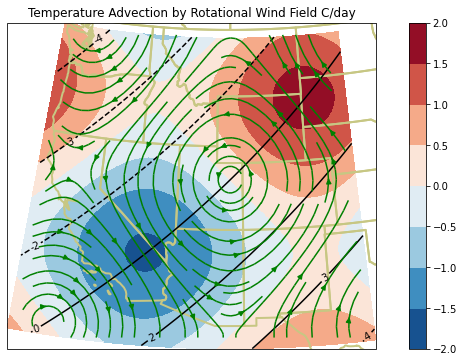

In [11]:
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t,colors='black',transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,tadv.m,levels=np.arange(-2,2.5,.5),cmap=colormap,transform=datacrs)
cb=plt.colorbar(cs1)
#ax.quiver(xh, yh, u.m, v.m, pivot='middle',
#         color='black', regrid_shape=25, transform=datacrs)
ax.streamplot(xh,yh, u.m,v.m,transform=datacrs,arrowsize=1,color='green')


ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('Temperature Advection by Rotational Wind Field C/day')
plt.savefig('../figs/tadv_vor.png')
plt.show()

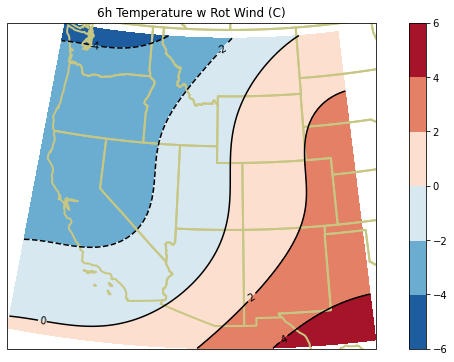

In [12]:
#temp after 6 hours in rotational wind
t6 = t.m + tadv.m
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t6,colors='black',levels=range(-6,8,2),transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,t6,cmap=colormap,levels=range(-6,8,2),transform=datacrs)
#ax.clabel(cs1,fmt='%0.1f',inline=True)
cb=plt.colorbar(cs1)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('6h Temperature w Rot Wind (C)')
plt.savefig('../figs/t6_vor.png')
plt.show()

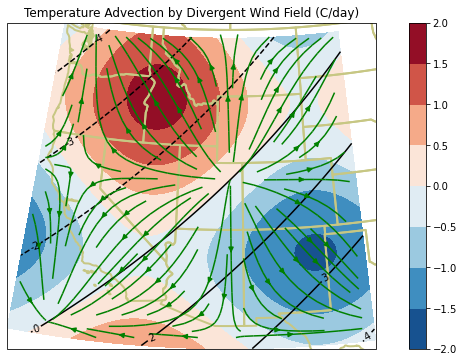

In [13]:
#compute temp advect for pure divergent wind field
u = np.sqrt(sp) * np.sin(2*np.pi*(xh-orig_x)/tlon)
v = np.sqrt(sp) * np.sin(2*np.pi*(yh-orig_y)/tlat)
u = u * units('m/s')
v = v * units('m/s')
#print(t[10,10],u[10,10],v[10,10])
tadv=mpcalc.advection(t,(u,v),(dx,dy))
#print(tadv[10,10])
#convert to C/(day)
tadv = 24*3600 * tadv
#print(np.nanmin(tadv.m),np.nanmax(tadv.m))
#tadv_r = np.nanmax(tadv.m)-np.nanmin(tadv.m)
#tadv_int = int(tadv_r/8)
#print(tadv_int)#compute wind for pure divergence
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t,colors='black',transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,tadv.m,levels=np.arange(-2,2.5,.5),cmap=colormap,transform=datacrs)
cb=plt.colorbar(cs1)
#ax.quiver(xh, yh, u.m, v.m, pivot='middle',
#         color='black', regrid_shape=25, transform=datacrs)
ax.streamplot(xh,yh, u.m,v.m,transform=datacrs,arrowsize=1,color='green')
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('Temperature Advection by Divergent Wind Field (C/day)')
plt.savefig('../figs/tadv_div.png')
plt.show()

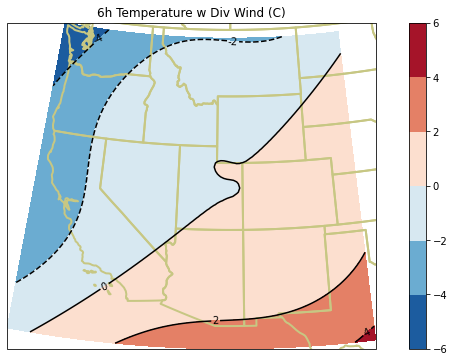

In [14]:
#temp after 6 hours in divergent wind
t6 = t.m + tadv.m
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t6,colors='black',levels=range(-6,8,2),transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,t6,cmap=colormap,levels=range(-6,8,2),transform=datacrs)
#ax.clabel(cs1,fmt='%0.1f',inline=True)
cb=plt.colorbar(cs1)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('6h Temperature w Div Wind (C)')
plt.savefig('../figs/t6_div.png')
plt.show()

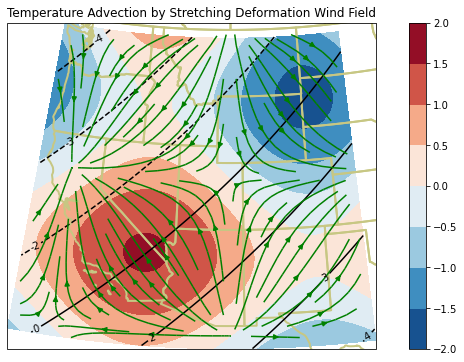

In [15]:
#compute temp advect for stretching deformation wind field
u = np.sqrt(sp) * np.sin(2*np.pi*(xh-orig_x)/tlon)
v = -np.sqrt(sp) * np.sin(2*np.pi*(yh-orig_y)/tlat)
u = u * units('m/s')
v = v * units('m/s')
#print(t[10,10],u[10,10],v[10,10])
tadv=mpcalc.advection(t,(u,v),(dx,dy))
#print(tadv[10,10])
#convert to C/(day)
tadv = 24*3600 * tadv
#print(np.nanmin(tadv.m),np.nanmax(tadv.m))
tadv_r = np.nanmax(tadv.m)-np.nanmin(tadv.m)
tadv_int = int(tadv_r/8)
#print(tadv_int)#compute wind for pure divergence
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t,colors='black',transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,tadv.m,levels=np.arange(-2,2.5,.5),cmap=colormap,transform=datacrs)
cb=plt.colorbar(cs1)
#ax.quiver(xh, yh, u.m, v.m, pivot='middle',
#         color='black', regrid_shape=25, transform=datacrs)
ax.streamplot(xh,yh, u.m,v.m,transform=datacrs,arrowsize=1,color='green')
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('Temperature Advection by Stretching Deformation Wind Field')
plt.savefig('../figs/tadv_st_def.png')
plt.show()

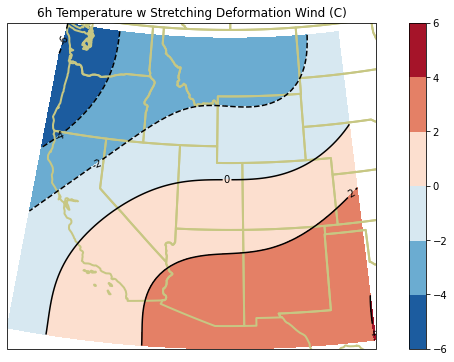

In [16]:
#temp after 6 hours in stretching deformation wind
t6 = t.m + tadv.m
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t6,colors='black',levels=range(-6,8,2),transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,t6,cmap=colormap,levels=range(-6,8,2),transform=datacrs)
#ax.clabel(cs1,fmt='%0.1f',inline=True)
cb=plt.colorbar(cs1)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('6h Temperature w Stretching Deformation Wind (C)')
plt.savefig('../figs/t6_st_def.png')
plt.show()

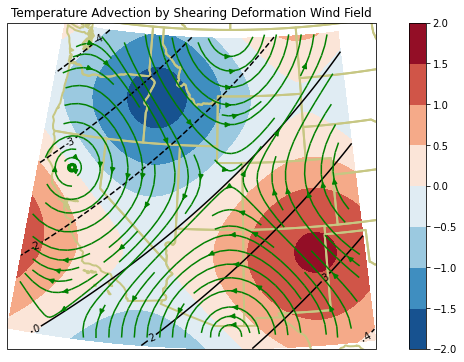

In [17]:
#compute temp advect for shearing deformation wind field
u = np.sqrt(sp) * np.sin(2*np.pi*(yh-orig_y)/tlat)
v = np.sqrt(sp) * np.sin(2*np.pi*(xh-orig_x)/tlon)
u = u * units('m/s')
v = v * units('m/s')
#print(t[10,10],u[10,10],v[10,10])
tadv=mpcalc.advection(t,(u,v),(dx,dy))
#print(tadv[10,10])
#convert to C/(day)
tadv = 24*3600 * tadv
#print(np.nanmin(tadv.m),np.nanmax(tadv.m))
tadv_r = np.nanmax(tadv.m)-np.nanmin(tadv.m)
tadv_int = int(tadv_r/8)
#print(tadv_int)#compute wind for pure divergence
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t,colors='black',transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,tadv.m,levels=np.arange(-2,2.5,.5),cmap=colormap,transform=datacrs)
cb=plt.colorbar(cs1)
#ax.quiver(xh, yh, u.m, v.m, pivot='middle',
#         color='black', regrid_shape=25, transform=datacrs)
ax.streamplot(xh,yh, u.m,v.m,transform=datacrs,arrowsize=1,color='green')
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('Temperature Advection by Shearing Deformation Wind Field')
plt.savefig('../figs/tadv_sh_def.png')
plt.show()

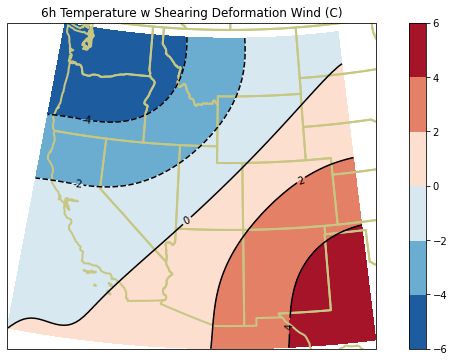

In [18]:
#temp after 6 hours in shearing deformation wind
t6 = t.m + tadv.m
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
cs = ax.contour(xh,yh,t6,colors='black',levels=range(-6,8,2),transform=datacrs)
ax.clabel(cs,fmt='%0.f',inline=True)
cs1 = ax.contourf(xh,yh,t6,cmap=colormap,levels=range(-6,8,2),transform=datacrs)
#ax.clabel(cs1,fmt='%0.1f',inline=True)
cb=plt.colorbar(cs1)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1,linewidth=2)
ax.set_title('6h Temperature w Shearing Deformation Wind (C)')
plt.savefig('../figs/t6_sh_def.png')
plt.show()